# Visualize current state - plot COVID data

In [1]:
countryToAnalyze = "India"
stateToAnalyze ="Karnataka"

In [2]:
#Download data from "https://github.com/CSSEGISandData/COVID-19.git"

confirmedCsv = "COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recoveredCsv = "COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
deathsCsv = "COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

try:
    f = open(confirmedCsv)
except IOError:
    print('Download data from "https://github.com/CSSEGISandData/COVID-19.git"')
    assert False
finally:
    f.close()

In [3]:
import pandas as pd

confirmedDf = pd.read_csv(confirmedCsv)
recoveredDf = pd.read_csv(recoveredCsv)
deathsDf = pd.read_csv(deathsCsv)

In [4]:
#from pandas_profiling import ProfileReport

##profile = ProfileReport(confirmedDf, title='Confirmed - Pandas Profiling Report', html={'style':{'full_width':True}})
#profile = ProfileReport(confirmedDf)

#profile
##profile.to_widgets()
##profile.to_notebook_iframe()

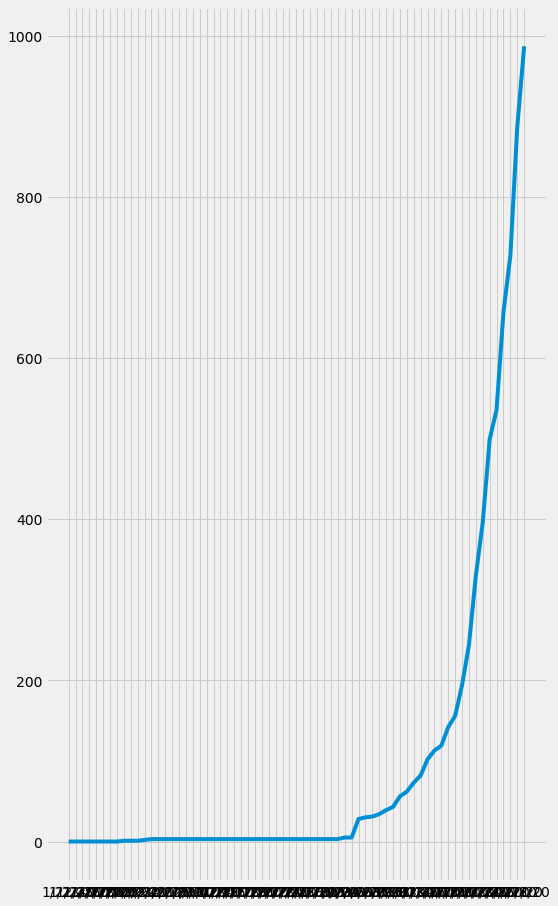

In [5]:
from matplotlib import pyplot
%matplotlib inline

pyplot.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
pyplot.rcParams['figure.figsize'] = 8, 15

confirmedTSDf = confirmedDf.loc[confirmedDf["Country/Region"] == countryToAnalyze].T[4:]
pyplot.figure(1)
pyplot.plot(confirmedTSDf)

[0 0 0 0 0 0 0 0 1 1 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 5 5 28 30 31 34 39 43 56 62 73 82 102 113 119 142 156 194 244 330
 396 499 536 657 727 887 987]
[0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 23 2 1 3 5 4 13 6 11 9 20 11 6 23 14 38 50 86 66 103 37 121 70
 160 100]


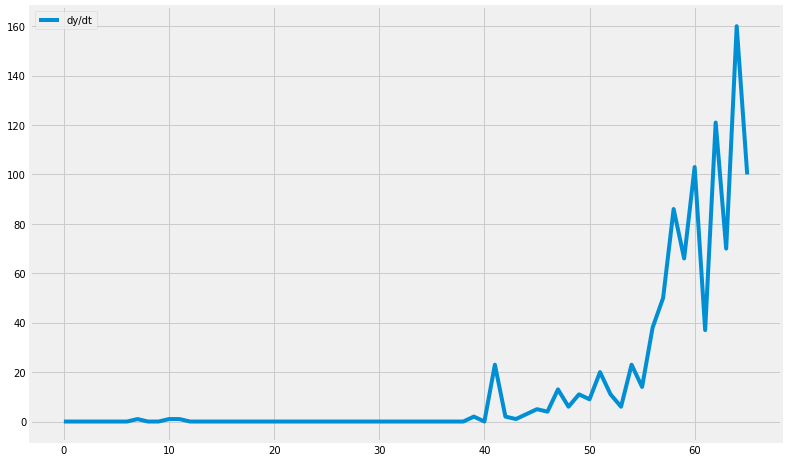

In [6]:
%matplotlib inline
import numpy as np
print(confirmedTSDf.values.flatten())
dy_dt= np.diff(confirmedTSDf.values.flatten())
print(dy_dt)
f, ax = pyplot.subplots(figsize=(12, 8))
pyplot.plot(dy_dt, label="dy/dt")
pyplot.legend()

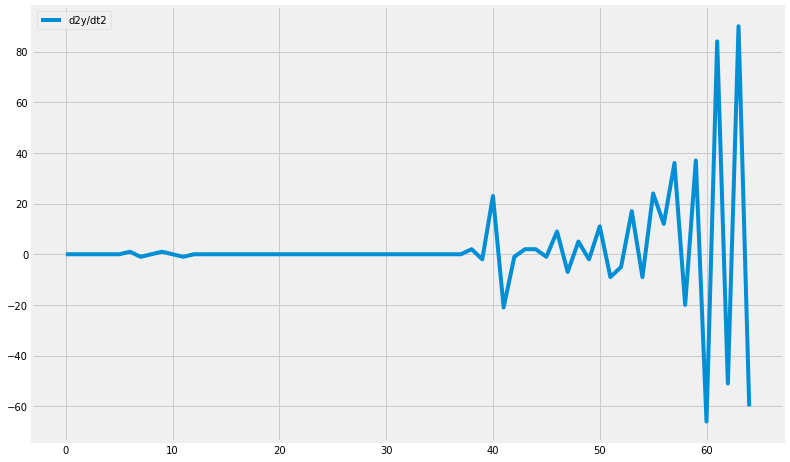

In [7]:
d2y_dt2= np.diff(dy_dt)
f, ax = pyplot.subplots(figsize=(12, 8))
pyplot.plot(d2y_dt2, label="d2y/dt2")
pyplot.legend()

# Analyze statewise for India 

Download data from - https://www.kaggle.com/sudalairajkumar/covid19-in-india


In [8]:
from datetime import datetime

covidDataFile = "covid19-in-india/covid_19_india.csv"
populationFile = "covid19-in-india/population_india_census2011.csv"
hospitalBedsFile = "covid19-in-india/HospitalBedsIndia.csv"
icmrTestingFile = "covid19-in-india/ICMRTestingDetails.csv"

try:
    f = open(covidDataFile)
except IOError:
    print('Download data from "https://www.kaggle.com/sudalairajkumar/covid19-in-india"')
    assert False
finally:
    f.close()
    
    
def parser(x):
    return datetime.strptime(x, '%d/%m/%y')

def icmrDateParser(x):
    return datetime.strptime(x, '%d/%m/%y %H:%M')

covidIndiaDataDf = pd.read_csv(covidDataFile, parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)
populationDf = pd.read_csv(populationFile)
hospitalBedsDf = pd.read_csv(hospitalBedsFile)
icmrTestingDf = pd.read_csv(icmrTestingFile, parse_dates=[1], date_parser=icmrDateParser)

## Capacity for maximum

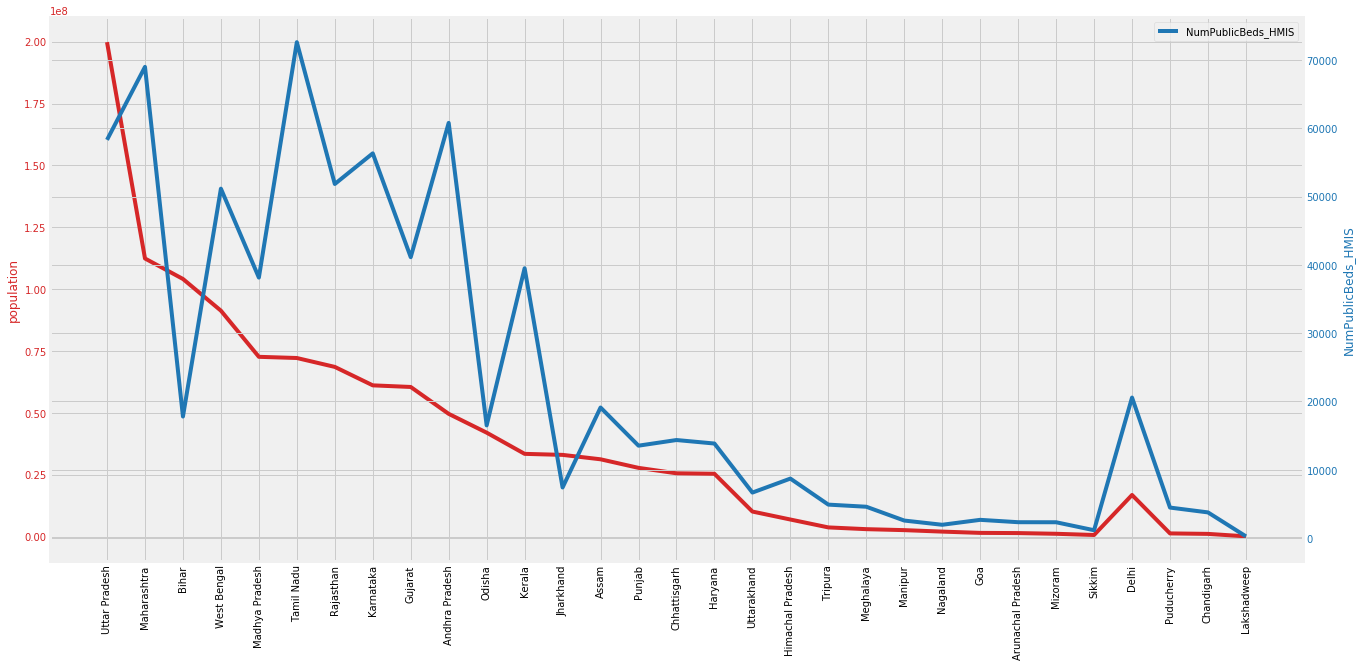

In [9]:
%matplotlib inline


hospitalBedsDf.dropna(axis=0, how='all', inplace=True)
hospitalBedsDf = hospitalBedsDf.fillna(-1)
hospitalBedsDf = hospitalBedsDf.loc[hospitalBedsDf["State/UT"] != "All India"]
hospitalBedsDf["State / Union Territory"] = hospitalBedsDf["State/UT"]

populationHospitalBedsdf = pd.merge(populationDf, hospitalBedsDf, on=['State / Union Territory'])
states = populationHospitalBedsdf["State / Union Territory"]

fig, ax1 = pyplot.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_ylabel('population', color=color)
pyplot.xticks(rotation=90)
ax1.plot(states, populationHospitalBedsdf["Population"], label ="population", color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('NumPublicBeds_HMIS', color=color)

ax2.plot(states, populationHospitalBedsdf["NumPublicBeds_HMIS"].astype(int), label="NumPublicBeds_HMIS", color=color)
ax2.tick_params(axis='y', labelcolor=color)
pyplot.legend()

## State-wise numbers

In [10]:
covidIndiaLastDayDataDf = pd.DataFrame(columns=covidIndiaDataDf.columns.values)

covidIndiaLastDayDataDf.insert(len(covidIndiaDataDf.columns), "dy_dt", [], True)
covidIndiaLastDayDataDf.insert(len(covidIndiaDataDf.columns), "d2y_dt2", [], True)
covidIndiaLastDayDataDf.insert(len(covidIndiaDataDf.columns), "days", [], True)


for state in states:
    stateDataDf = covidIndiaDataDf.loc[covidIndiaDataDf["State/UnionTerritory"] ==state]
    stateDataDf.sort_values('Date',ascending=False,inplace=True)
    if stateDataDf.shape[0] != 0:
        covidIndiaLastDayDataDf = covidIndiaLastDayDataDf.append(stateDataDf.iloc[0])
        dy_dt= np.diff(stateDataDf["ConfirmedIndianNational"].values)
        d2y_dt2= np.diff(dy_dt)
        days = 0
        if len(stateDataDf.index) > 0:
            date = stateDataDf.index[-1]
            days = (stateDataDf.index[0] - stateDataDf.index[-1]).days
            #print(days)
        else:
            date=datetime.strptime("1/1/1970", '%d/%m/%y')
        if date == 0:
            date=datetime.strptime("1/1/1970", '%d/%m/%y')
        last_dy_dt = 0
        if dy_dt.shape[0] != 0:
            last_dy_dt = dy_dt[0]
        last_d2y_dt2 = 0
        if d2y_dt2.shape[0] != 0:
            last_d2y_dt2 = d2y_dt2[0]
        covidIndiaLastDayDataDf.iloc[-1,-1] = -1*last_dy_dt
        covidIndiaLastDayDataDf.iloc[-1, -2] = -1*last_d2y_dt2
        covidIndiaLastDayDataDf.iloc[-1, -3] = days
    else:
        covidIndiaLastDayDataDf = covidIndiaLastDayDataDf.append(pd.Series(), ignore_index=True)
        covidIndiaLastDayDataDf.iloc[-1, 1] = state
    

covidIndiaLastDayDataDf.fillna(0, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


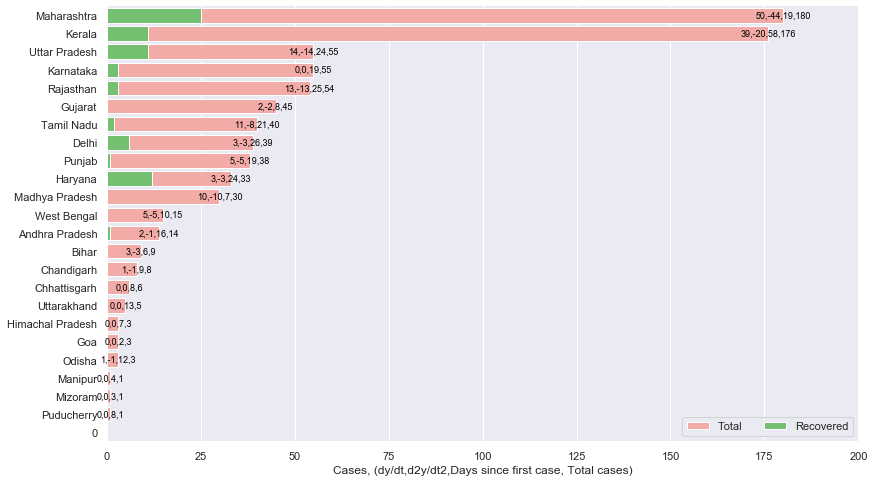

In [11]:
import seaborn as sns

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

f, ax = pyplot.subplots(figsize=(12, 8))
covidIndiaLastDayDataDf['Name of State / UT']=covidIndiaLastDayDataDf['State/UnionTerritory']
covidIndiaLastDayDataDf['Total cases']=covidIndiaLastDayDataDf['ConfirmedIndianNational']+covidIndiaLastDayDataDf['ConfirmedForeignNational']
covidIndiaLastDayDataDf['Cured/Discharged/Migrated']=covidIndiaLastDayDataDf['Cured']
data = covidIndiaLastDayDataDf[['Name of State / UT','Total cases','Cured/Discharged/Migrated','Deaths', 'dy_dt', 'd2y_dt2', 'days']]

data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,
            label="Total", color="r", ci=None)

sns.set_color_codes("muted")
g =sns.barplot(x="Cured/Discharged/Migrated", y="Name of State / UT", data=data,
            label="Recovered", color="g", ci=None)


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200), ylabel="",
       xlabel="Cases, (dy/dt,d2y/dt2,Days since first case, Total cases)")
sns.despine(left=True, bottom=True)


order = 0
for index, row in data.iterrows():
    val = str(int(row['dy_dt'])) + "," + str(int(row['d2y_dt2'])) + "," + str(int(row['days'])) + ","+str(row["Total cases"])
    if val != "0,0,0,0":
        g.text(row["Total cases"], order, val, color='black', ha="center", fontsize=9, horizontalalignment='left',  verticalalignment='center')
    order += 1
    

## Testing to positive - trend and ratio

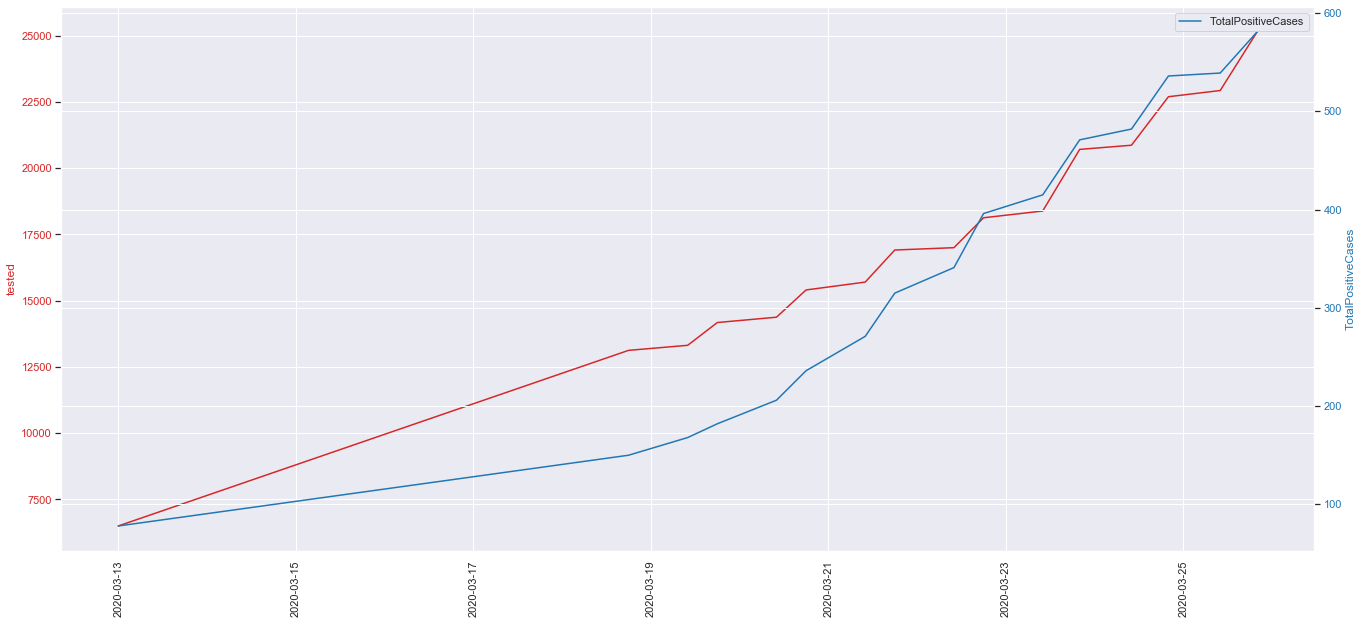

In [12]:
fig, ax1 = pyplot.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_ylabel('tested', color=color)
pyplot.xticks(rotation=90)
ax1.plot(icmrTestingDf["DateTime"], icmrTestingDf["TotalSamplesTested"], label ="TotalSamplesTested", color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('TotalPositiveCases', color=color)

ax2.plot(icmrTestingDf["DateTime"], icmrTestingDf["TotalPositiveCases"], label="TotalPositiveCases", color=color)
ax2.tick_params(axis='y', labelcolor=color)
pyplot.legend()


# Giving an Index to states based on their handling - where to focus?

Lower the better

In [13]:
#Penalty for delay since first case
data["responseIndex"] = (0.001+data["days"])
#Penalty for rate of growth of cases
data["responseIndex"] = data["responseIndex"] + data["responseIndex"] * 1000*(0.001+data["dy_dt"])
#Penalty if the rate of rate itself is up
data["responseIndex"] = data["responseIndex"] + data["responseIndex"] * 1000*(0.001+data["d2y_dt2"])

data["responseIndex"] = data["responseIndex"] + data["responseIndex"] *100*(0.001+data["Total cases"])/(data["Total cases"].sum())

data.sort_values('responseIndex',ascending=False,inplace=True)
data.reset_index()
indexData = data[['Name of State / UT', 'responseIndex']]
indexData.drop(index=0, inplace=True)
display(indexData)

,Name of State / UT,responseIndex
7,Karnataka,5.895539e+02
17,Uttarakhand,8.395388e+01
15,Chhattisgarh,5.559810e+01
18,Himachal Pradesh,3.832832e+01
28,Puducherry,3.593963e+01
21,Manipur,1.797206e+01
25,Mizoram,1.348017e+01
23,Goa,1.095486e+01
12,0,4.000491e-03
26,0,4.000491e-03


# Analyze a particular State

In [14]:
covidStateDataDf = covidIndiaDataDf.loc[covidIndiaDataDf["State/UnionTerritory"]==stateToAnalyze]

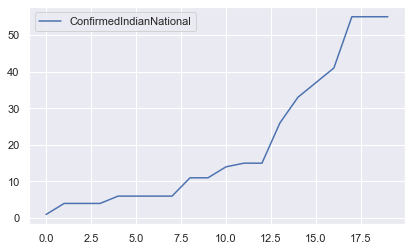

In [15]:
%matplotlib inline
pyplot.figure(1)
pyplot.plot(covidStateDataDf["ConfirmedIndianNational"].values, label="ConfirmedIndianNational")
pyplot.legend()

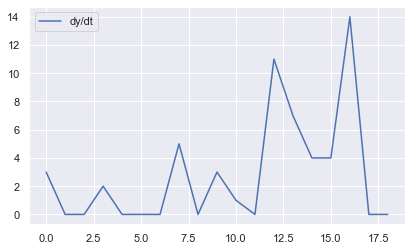

In [16]:
dy_dt= np.diff(covidStateDataDf["ConfirmedIndianNational"].values)
pyplot.figure(1)
pyplot.plot(dy_dt, label="dy/dt")
pyplot.legend()

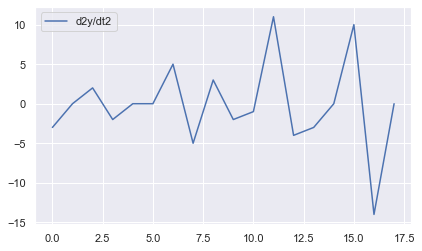

In [17]:
d2y_dt2= np.diff(dy_dt)
pyplot.figure(1)
pyplot.plot(d2y_dt2, label="d2y/dt2")
pyplot.legend()

In [18]:
provinceCsv = "covid19-in-italy/covid19_italy_province.csv"
regionCsv = "covid19-in-italy/covid19_italy_region.csv"

try:
    f = open(confirmedCsv)
except IOError:
    print('Download data from "https://www.kaggle.com/sudalairajkumar/covid19-in-italy"')
    assert False
finally:
    f.close()
    
import pandas as pd

provinceDf = pd.read_csv(provinceCsv)
regionDf = pd.read_csv(regionCsv)    

### Printing Data for Italy 

Total number of positive cases in Italy ::  916239


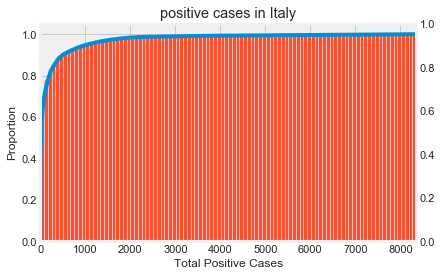

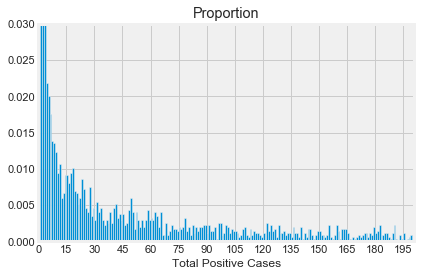

In [39]:
from matplotlib import pyplot
import numpy as np
from mlxtend.plotting import ecdf
%matplotlib inline
data_series = provinceDf['TotalPositiveCases']
data_series = data_series.sort_values()
data_series[len(data_series)] = data_series.iloc[-1]
total_cases = sum(data_series)
print('Total number of positive cases in Italy :: ',total_cases)

cum_dist = np.linspace(0.,1.,len(data_series))
ser_cdf = pd.Series(cum_dist, index=data_series)
ser_cdf.plot()

data_series.hist(cumulative=True, density=1, bins=100)
pyplot.xlabel('Total Positive Cases')
pyplot.ylabel('Proportion')
ax = pyplot.axes()
ax_bis = ax.twinx()
pyplot.title("positive cases in Italy")
pyplot.grid()
pyplot.show()


perctile = np.percentile(data_series, 80) # claculates 80th percentile
bins = np.arange(0,perctile+1,1)  # creates list increasing by 1 to 96th percentile 
pyplot.hist(data_series, bins = bins, normed=True)
pyplot.axis([0, perctile, 0, 0.03])  #Defines the axis' by the 80th percentile and 10%Relative frequency
pyplot.xlabel('Total Positive Cases')
pyplot.xticks(np.arange(0, perctile, 15.0))
pyplot.title('Proportion')
pyplot.grid(True)
pyplot.style.use("fivethirtyeight")
pyplot.show()